<a href="https://colab.research.google.com/github/MotunrayoOye/learn-co-sandbox/blob/master/Predicting_Pre_eclampsia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from IPython.display import display, Markdown # Import Markdown along with display

# Predicting the Risk of Pre-Eclampsia in Pregnant Women

The objective of this assignment is to explore machine learning models to predict the risk of pre-eclampsia in pregnant women. The analysis will provide clinicians, midwives and other key staff insights on mitigating the risks of pre-eclampsia.

# 1. Importing Libraries



In [8]:
#Importing all necessary libaries
from IPython.display import display, Markdown # Import Markdown along with display
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt



# 2. Loading the Dataset

In [9]:
#defining the dataset
preeclampsia_data = pd.read_csv('/content/Maternal Health Risk Data .csv')



# 3. Exploratory Data Analysis

## 3.1. Basic Dataset Information

This checks the basic information for the dataset this includes; null values, column types and dataset shape.

In [10]:
print("\nDataset Information:")
print(preeclampsia_data.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None


### 3.1.2. Displaying Dataset
This displays the first 10 rows of the dataset - giving us an overview of dataset content

In [11]:

print('Dataset First Ten Row:')
preeclampsia_data.head(10) #displaying the first 10 rows of dataset


Dataset First Ten Row:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


### 3.1.3. Displaying unique values
This is to explore the unique values in each column. This analysis is particularly useful for understanding the variety of the data in the dataset in order to identify potential issues or patterns within the data, for example an unexpected value such as a negative number in age or categorial variables that needs to be encoded.

In [12]:
for column in preeclampsia_data.columns:

  print (f"{column} has {preeclampsia_data[column].nunique()} unique values")
  print (f"{column}: {preeclampsia_data[column].unique()}")



Age has 50 unique values
Age: [25 35 29 30 23 32 42 19 20 48 15 50 10 40 21 18 16 22 49 28 12 60 55 45
 31 17 26 54 44 33 13 34 38 39 63 14 37 51 62 43 65 66 56 70 27 36 59 24
 41 46]
SystolicBP has 19 unique values
SystolicBP: [130 140  90 120  85 110  70 100  75  95  76  80 115 135 160 129  83  99
  78]
DiastolicBP has 16 unique values
DiastolicBP: [ 80  90  70  85  60  89  75 100  50  65  95  49  63  69  76  68]
BS has 29 unique values
BS: [15.   13.    8.    7.    6.1   7.01 11.    6.9  18.    6.7   7.5   7.2
  7.1   6.4   9.    6.    7.7  12.   16.    7.8   6.8   7.9  17.   19.
 10.    6.3   6.6   6.5   7.6 ]
BodyTemp has 8 unique values
BodyTemp: [ 98.  100.  102.  101.  103.   98.4  99.   98.6]
HeartRate has 16 unique values
HeartRate: [86 70 80 76 78 77 88 90 66 82 60 75 67 65 68  7]
RiskLevel has 3 unique values
RiskLevel: ['high risk' 'low risk' 'mid risk']


### 3.2. Visualizing Feature Distributions

This part of the analysis intends to visulaise the distribution of the numerical values within the dataset in relation to the maternal health risks. visualising the data distribution aids in understanding rhe frequency of the different values and allows us to identify possible patterns or outliers.

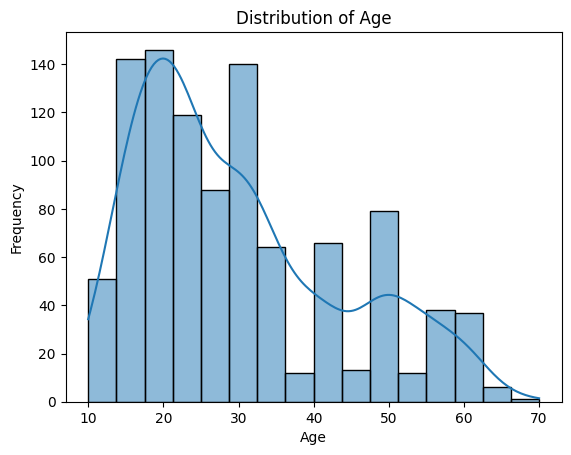

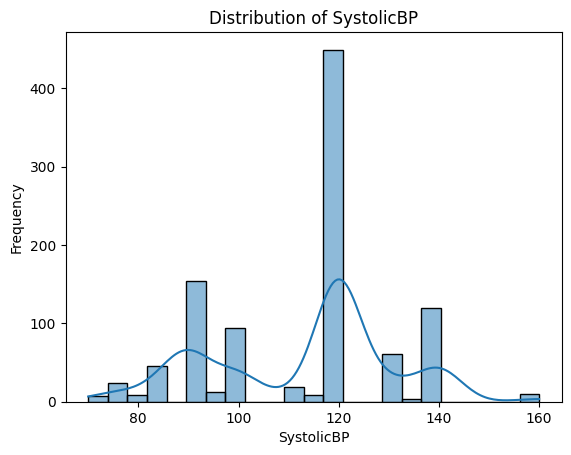

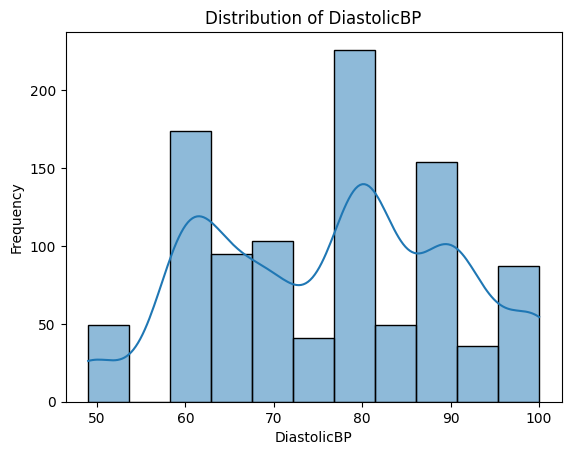

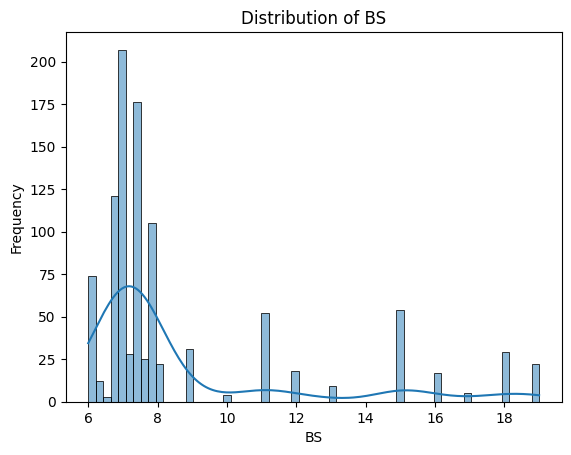

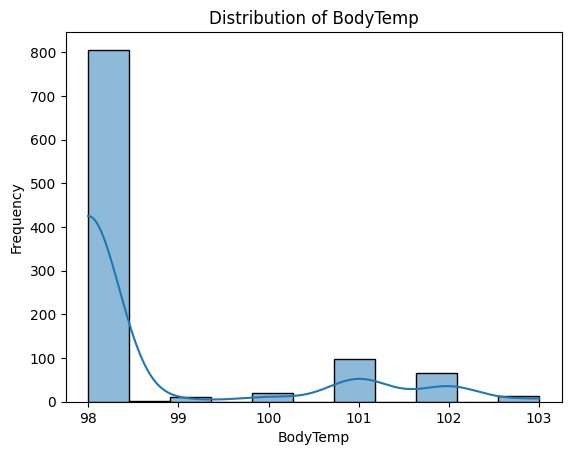

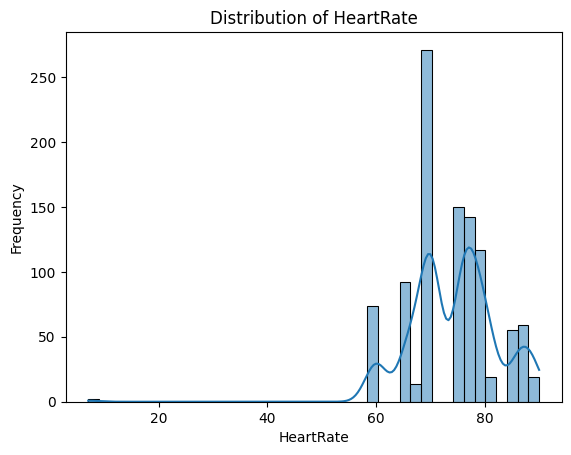

In [13]:
#Visualising the distribution of the numerical values in the dataset - this helps understand the frequency of values and helps us understand
numerical_columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
for column in numerical_columns:
  sns.histplot(preeclampsia_data[column], kde=True)
  plt.title(f'Distribution of {column}')
  plt.xlabel (column)
  plt.ylabel('Frequency')
  plt.show()

### 4.4. Checking for Outliers

In [14]:

outlier_check = preeclampsia_data.describe()
for column in outlier_check.columns:
  Q1 = outlier_check[column].loc['25%']
  Q3 = outlier_check[column].loc['75%']
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
outlier_check.loc['lower_bound', column] = lower_bound
outlier_check.loc['upper_bound', column] = upper_bound
outlier_check

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000
lower_bound,NaN,NaN,NaN,NaN,NaN,55.000000
upper_bound,NaN,NaN,NaN,NaN,NaN,95.000000


### 4.5. Outlier check



In [15]:
import numpy as np
import pandas as pd

def modified_zscore(data):
    """Calculates the Modified Z-score for a given dataset.

    Args:
        data (pd.Series or np.array): The data to calculate the Modified Z-score for.

    Returns:
        np.array: The Modified Z-scores for each data point.
    """

    median = np.median(data)
    mad = np.median(np.abs(data - median))

    modified_zscores = 0.6745 * (data - median) / mad  # 0.6745 is a consistency factor

    return modified_zscores


numerical_columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

for column in numerical_columns:
    modified_zscores = modified_zscore(preeclampsia_data[column])

    # Identify outliers based on a threshold (e.g., 3.5)
    outliers = preeclampsia_data[column][np.abs(modified_zscores) > 3.5]
    print(f"Outliers in {column}: {outliers}")

Outliers in Age: Series([], Name: Age, dtype: int64)
Outliers in SystolicBP: Series([], Name: SystolicBP, dtype: int64)
Outliers in DiastolicBP: Series([], Name: DiastolicBP, dtype: int64)
Outliers in BS: 0       15.0
1       13.0
7       11.0
9       18.0
14      11.0
        ... 
1008    11.0
1009    15.0
1010    18.0
1011    19.0
1012    18.0
Name: BS, Length: 206, dtype: float64
Outliers in BodyTemp: 2       100.0
7       102.0
13      100.0
18      101.0
35      102.0
        ...  
1000    102.0
1004    101.0
1005    103.0
1006    102.0
1013    101.0
Name: BodyTemp, Length: 210, dtype: float64
Outliers in HeartRate: 499    7
908    7
Name: HeartRate, dtype: int64


### 4.6. Removing Heart Rate Outliers

In [16]:
#removing the heartrate outliers

preeclampsia_data = preeclampsia_data[preeclampsia_data['HeartRate'] != 7]

### 4.7. Analysing Relationship Between **features**


Correlation Matrix:
                  Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate
Age          1.000000    0.417292     0.398234  0.473299 -0.256640   0.067727
SystolicBP   0.417292    1.000000     0.787198  0.425439 -0.286366  -0.018328
DiastolicBP  0.398234    0.787198     1.000000  0.423803 -0.257702  -0.051542
BS           0.473299    0.425439     0.423803  1.000000 -0.103765   0.149351
BodyTemp    -0.256640   -0.286366    -0.257702 -0.103765  1.000000   0.097749
HeartRate    0.067727   -0.018328    -0.051542  0.149351  0.097749   1.000000


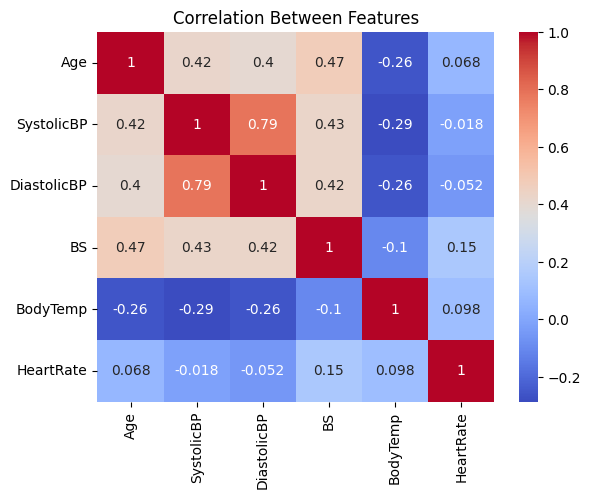

In [17]:
corr_matrix = preeclampsia_data[numerical_columns].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()

### 4.8. Analysing Target Variable - Risk Level


Risk Level Distribution:
RiskLevel
low risk     404
mid risk     336
high risk    272
Name: count, dtype: int64


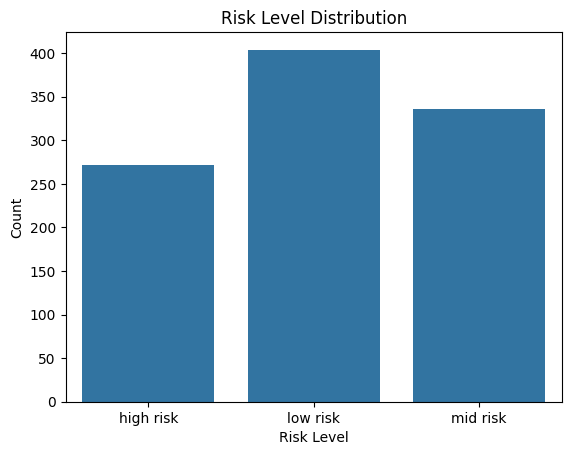

In [18]:
#Calling the risk level distribution
print("\nRisk Level Distribution:")
print(preeclampsia_data['RiskLevel'].value_counts())

sns.countplot(x='RiskLevel', data=preeclampsia_data)
plt.title('Risk Level Distribution')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

# this examines the balance of classes between the target variable.

### 4.9. Analysing the Relationship Between Features and Target

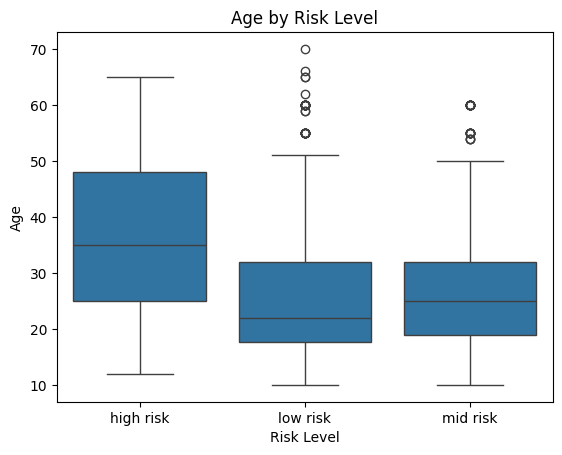

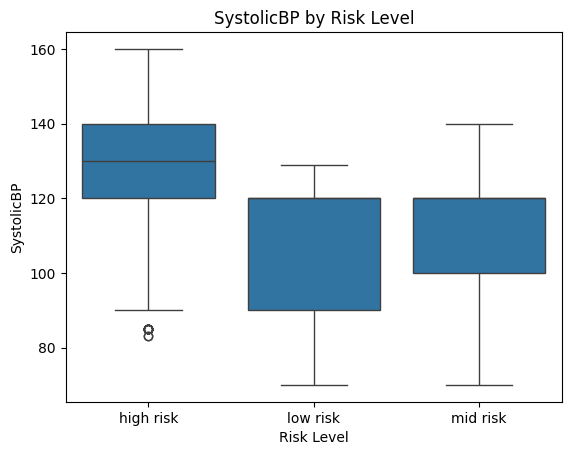

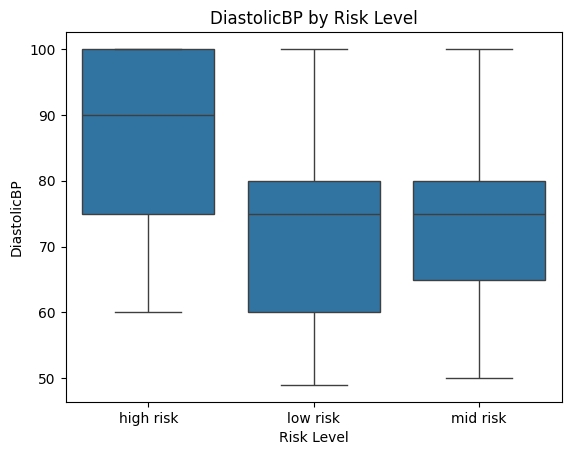

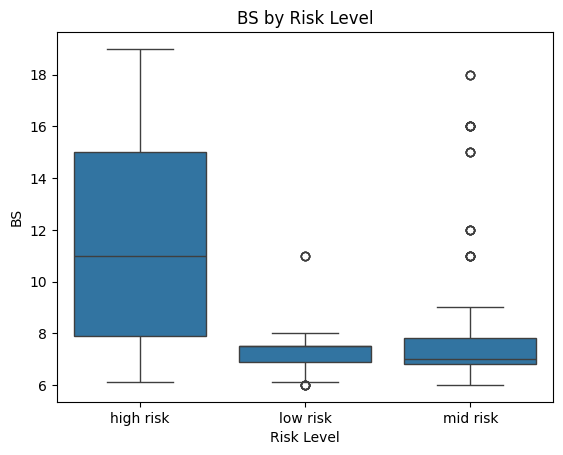

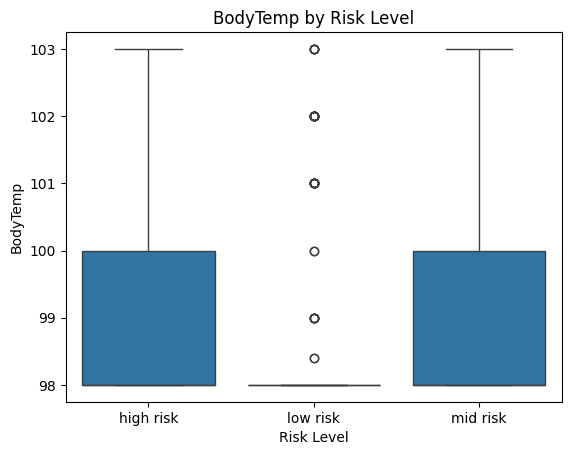

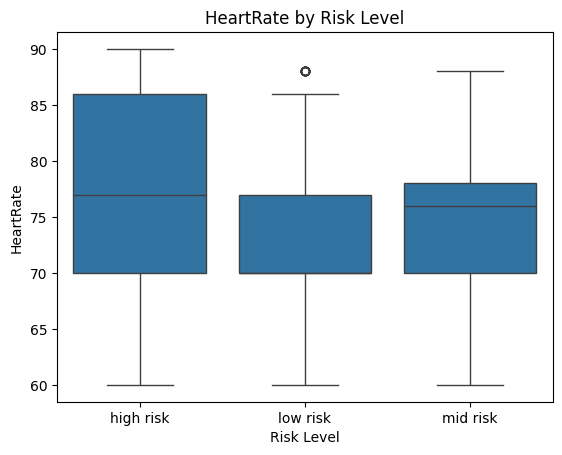

In [19]:
for column in numerical_columns:
  sns.boxplot(x=preeclampsia_data['RiskLevel'], y=preeclampsia_data[column])
  plt.title(f"{column} by Risk Level")
  plt.xlabel('Risk Level')
  plt.ylabel(column)
  plt.show()

## Feature Engineering

In [20]:
#Calculating the Mean Artery Pressure (MAP)
#-This merges the DiastolicBP and SystolicBP to create one feature

preeclampsia_data['MAP'] = (preeclampsia_data['DiastolicBP'] + (1/3) * preeclampsia_data['SystolicBP']- preeclampsia_data['DiastolicBP']) / 2

print(preeclampsia_data[['DiastolicBP', 'SystolicBP', 'MAP']].head())

   DiastolicBP  SystolicBP        MAP
0           80         130  21.666667
1           90         140  23.333333
2           70          90  15.000000
3           85         140  23.333333
4           60         120  20.000000


# 5. Data Preprocessing

### 5.1. Encoding Categorical Variable (Risk Level)

In [21]:
label_encoder = LabelEncoder()
preeclampsia_data['RiskLevel'] = label_encoder.fit_transform(preeclampsia_data['RiskLevel'])

print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
print("\nEncoding Categories:")
print("High Risk: 0")
print("Low Risk: 1")
print("Mid Risk: 2")

{'high risk': 0, 'low risk': 1, 'mid risk': 2}

Encoding Categories:
High Risk: 0
Low Risk: 1
Mid Risk: 2


### 5.2. Standardizing Numerical Variables

In [22]:
#calling the numerical columns to be scaled
numerical_columns = ['Age',  'BS', 'BodyTemp', 'HeartRate', 'MAP']

scaler = StandardScaler()
preeclampsia_data[numerical_columns] = scaler.fit_transform(preeclampsia_data[numerical_columns])

#creating a data frame for the scaled data
data_scaled = pd.DataFrame(preeclampsia_data, columns=numerical_columns)
data_scaled.head()


,Age,BS,BodyTemp,HeartRate,MAP
0,-0.363796,1.903633,-0.485808,1.538308,0.913349
1,0.378765,1.296644,-0.485808,-0.589878,1.456516
2,-0.066772,-0.220828,0.972192,0.740239,-1.259323
3,0.007484,-0.524323,-0.485808,-0.589878,1.456516
4,0.378765,-0.797468,-0.485808,0.208192,0.370181


### 5.3. Combining the processed Data

In [23]:
preeclampsia_final = pd.concat([data_scaled, preeclampsia_data[['RiskLevel']]], axis=1)
preeclampsia_final.head()

,Age,BS,BodyTemp,HeartRate,MAP,RiskLevel
0,-0.363796,1.903633,-0.485808,1.538308,0.913349,0
1,0.378765,1.296644,-0.485808,-0.589878,1.456516,0
2,-0.066772,-0.220828,0.972192,0.740239,-1.259323,0
3,0.007484,-0.524323,-0.485808,-0.589878,1.456516,0
4,0.378765,-0.797468,-0.485808,0.208192,0.370181,1


# 6. Machine Learning Models

## 6.1. Supervised Learning - Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#defining feature and target variable using processed data
X = data_scaled
y = preeclampsia_final['RiskLevel']

#spliting the data - 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#creating model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

#training the model

rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### 6.1.2. Making Predictions

In [44]:
#predicting
y_pred = rf.predict(X_test)

### 6.1.3. Evaluating Model performace

**ACCURACY**

In [45]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8423645320197044


**Classification Report**

In [46]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.88      0.78      0.82        81
           2       0.74      0.84      0.78        67

    accuracy                           0.84       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.85      0.84      0.84       203



**Confusion Matrix**

In [47]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[52  0  3]
 [ 1 63 17]
 [ 2  9 56]]


**Feature Importance**

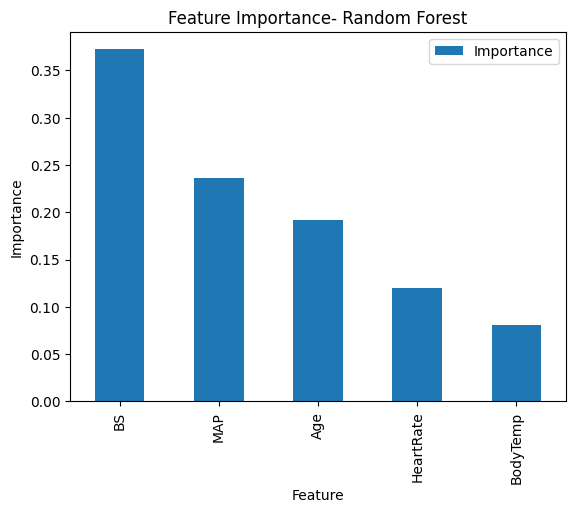

In [49]:
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

importance_df.plot(kind='bar', x='Feature', y='Importance', title='Feature Importance- Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

## 6.2. Supervised learning - Logistic Regression Model  

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#defining feature and target variable using processed data
X = data_scaled
y = preeclampsia_final['RiskLevel']

#spliting the data - 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#creating the model
logistic_model = LogisticRegression(random_state=42)

#fitting the model
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

### 6.2.1. Making predictions

In [25]:

#making predictions
y_pred = logistic_model.predict(X_test)



### 6.2.2. Evaluating Model Performance

**ACCURACY**

In [26]:
#evaluating accuracy for logistic regression after feature engineering
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.6108374384236454


CLASSIFICATION REPORT

In [27]:
#classification report for logistic regression before feature engineering
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.85      0.75        48
           1       0.64      0.76      0.69        83
           2       0.48      0.28      0.35        72

    accuracy                           0.61       203
   macro avg       0.59      0.63      0.60       203
weighted avg       0.59      0.61      0.58       203



CONFUSION MATRIX

Confusion Matrix:
[[41  1  6]
 [ 4 63 16]
 [17 35 20]]


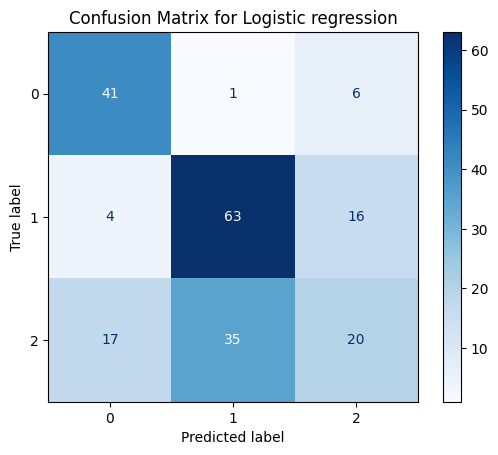

In [28]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns



#confusion matrix for logistic regression before feature engineering
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic regression')
plt.show()



**Visualising Findings**

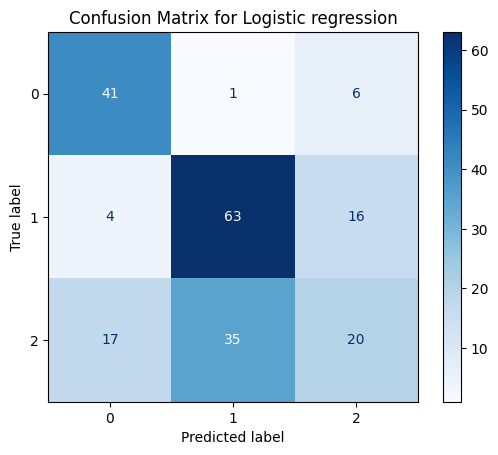

In [29]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic regression')
plt.show()

## 6.2. Supervised Learning - Gradient Boosting Model

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#defining feature and target variable using processed data
X = data_scaled
y = preeclampsia_final['RiskLevel']

#spliting the data - 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#creating model

gradient_model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1)
gradient_model.fit(X_train, y_train)

#fitting the model
gradient_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### 6.2.1. Making Predictions

In [31]:
y_pred = gradient_model.predict(X_test)

**ACCURACY**

In [32]:
#evaluating accuracy for gradient boosting after feature engineering
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7881773399014779


CLASSIFICATION REPORT

In [33]:
#classification for gradient boosting after feature engineering

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        48
           1       0.81      0.77      0.79        83
           2       0.73      0.71      0.72        72

    accuracy                           0.79       203
   macro avg       0.79      0.81      0.80       203
weighted avg       0.79      0.79      0.79       203



**CONFUSION MATRIX**

In [34]:
#confusion matrix for gradient boosting after feature engineering

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[45  0  3]
 [ 3 64 16]
 [ 6 15 51]]


## 6.3. Unsupervised Learning - KMeans Model

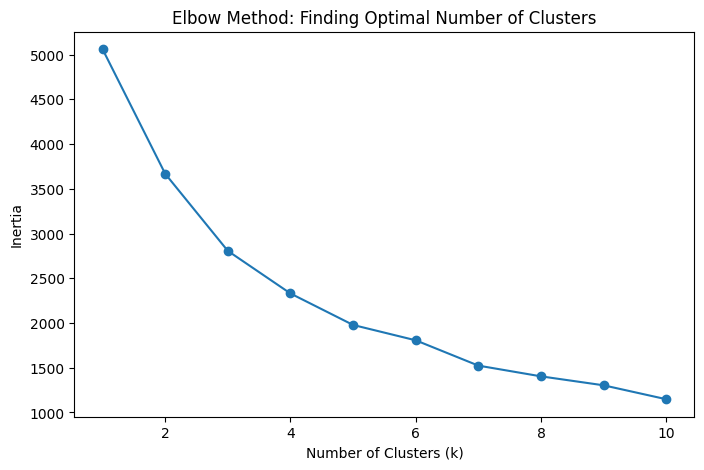

In [35]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#the features for clustering - the standardised numerical value
X = data_scaled

#testing cluster size from 1-10
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

#plotting inertia v no. of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method: Finding Optimal Number of Clusters')
plt.xlabel("Number of Clusters (k)")
plt.ylabel('Inertia')
plt.show()


### 6.3.1. Applying KMeans with Optimal Number of Clusters

In [36]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)
preeclampsia_final['Cluster'] = y_kmeans

**VISUALISING THE CLUSTER**

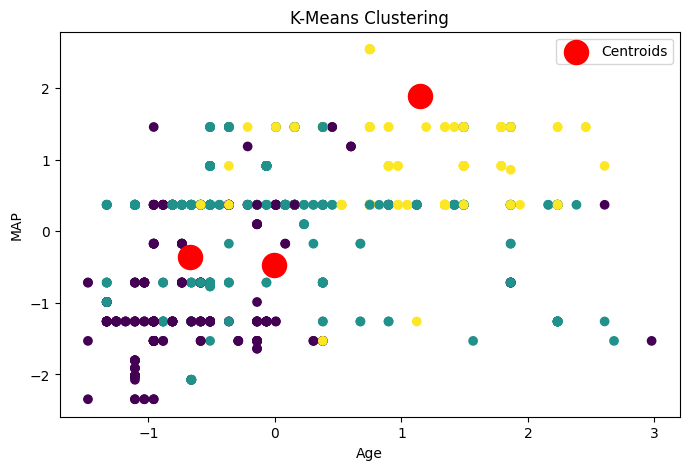

In [37]:
plt.figure(figsize=(8, 5))
plt.scatter(X['Age'], X['MAP'], c=y_kmeans, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('MAP')
plt.legend()
plt.show()
plt.show()

Evaluating the Quality of Cluster

In [38]:
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.30065335906573276


In [39]:
print(preeclampsia_final.groupby('Cluster').mean())

              Age        BS  BodyTemp  HeartRate       MAP  RiskLevel
Cluster                                                              
0       -0.667268 -0.353146  0.990944   0.377985 -0.943901   1.151125
1       -0.010251 -0.467490 -0.450703  -0.377576  0.229695   1.260194
2        1.144082  1.884868 -0.408988   0.413430  0.942259   0.370968


# Findings

** Dataset Overview **

1. The dataset consists of 1014 rows/entries and 7 colums.
2. There are no missing values, which makes it ideal.
3. The target variable is RiskLevel

**Outliers**

Through examining the dataset we notice several outliers, however the ones that standout in particular are in age and heartrate.

1. The Minimum age in the dataset is 10. Though this is alarming however after examining the origin of the data, it seems this is accurate.

2. The minimum resting heartrate is 7, this is very unlikely as the minimum resting heartrate for a living human is 50. It can be assumed that this is a data entry error.

3. The lower_bound and upper_ bound for all colunms except HeartRate displays "NaN". This Suggest the IQR based outlier detection might not be applicable. It could also suggest the dectection method is encoutering issues with the data in the colums. However, because we have examined the dataset closely we know that there are no missing values and the data types are numerical; we can assume that the method is not applicable and try another outlier detection method.

**Using the modified_zscore **

1. There are no outliers detected in Age, SystolicBP, DiastolicBP,

2. However outliers were detected in Blood Sugar, Boddy Temparature and HeartRate

There were;
1. A total of 206 outliers found in the Blood Sugar column.

2. A total of 210 outliers were detected in the BodyTemp column.

3. A total of 2 outliers in the HeartRate column:


*   In row 499, a heart rate of 7 was detected as an outlier.

*   In row 908, a heart rate of 7 was also detected as an outlier.

Based on domain knowledge and advice from a midwife - it was identified that the outliers found in BS and BT are accurate however the outliers found in heartrate are likely data entry error as the minimum resting heart rate for a living human is 50 beats per min.

To address the outliers there are several solutions;

1. Imputation; This method will replace the outlier values with a more plausible estimate. the outlier value can be replaced with the median or mean heart rate for the dataset.
2. Removal; to maintain the originality of the data and avoid introducing potentially artificial values through imputation, it's ideal to remove the rows containing the heart rate outliers.
Since there are only two outliers the easiest solution is to remove both outliers

**Analysing relationship between features **

1. **SystolicBP and DiastolicBP**
The key observation shows a strong positive correlation between systolicBP and DiastolicBP,correlation: (0.79) - which is to be expected as as both feature are crucial in reading BP, additionlly, blood pressure plays a huge in diagnosing PE.

2. **Age and Blood Sugar**
Addtionally, there shows a moderate positive correlation with Age and BS - it suggest older women have a higher BS - (0.47)

3. **Body Temp & age and systolic/diastolicBP**
Theres a weak negative correlation between these features which suggest BT isn't strongly associated with these factors

**Since there is a strong correlation between SystolicBP and DiastolicBP  (0.79), we may check for multicollinearity and drop a feature - however as the sBP and dBP are not independent variables and are highly linked and dependent on each other in diagnosing PE,dropping one may result in loss of crucial information - therefore in order to avoid Unstable Coefficients which might make it hard for the model to determine which of the variables contributes significantly to the target and make it hard to interpret and rely on the model for insight we are going to merge



**Analysing relationship between features and Target variable**

Low risk: Approximately 40% (406/1014) of the pregnant women in the dataset are low risk.
Mid risk: Approximately 33% (336/1014) are mid risk.
High risk: Approximately 27% (272/1014) are high risk.

although the distribution is not perfectly balanced its still suitable for modelling as its not severly imbalanced.


**Visualizing data distributions**

Kernel Density Estimation (KDE) Curve: The KDE curve provides a smoothed representation of the data distribution, overlaying the histogram. It helps to visualize the overall shape of the distribution and identify potential peaks or clusters.
By creating and examining the histograms we can gain insight into:


1. Central Tendency: Where most of the data points are concentrated (e.g., the
average age, the most common blood pressure range).

2. Spread/Variability: How spread out the data is (e.g., a wide range of ages vs. a narrow range).

3. Shape of Distribution: Whether the data is normally distributed (bell-shaped), skewed (leaning to one side), or has other patterns.
Outliers: Data points that are significantly different from the majority of the data.

4. Outliers may appear as isolated bars or points far from the main distribution.

For example the the histogram for SystolicBP shows a well rounded distribution centered around 120, this suggest the average SystolicBP of pregnant women in the dataset is around 120. additionally the histogram for age shows the average is around 20 years old.


**Boxplot**

By examining the box plots, you can gain insights into the following:

1. Central Tendency: The median line within the box indicates the center of the data distribution.

2. Spread/Variability: The length of the box (IQR) and the extent of the whiskers show the spread or variability of the data. A longer box or longer whiskers indicate greater variability.

3. Skewness: If the median line is not centered within the box, it suggests that the data is skewed (not symmetrical).

4. Outliers: The presence of outlier points indicates values that are significantly different from the rest of the data. These outliers may need further investigation or special consideration in your analysis.

In the context of the pre-eclampsia dataset, these box plots will help visualize the distribution of numerical variables such as age, blood pressure, body temperature, and heart rate. This information can be valuable in identifying patterns, potential risk factors, and outliers related to pre-eclampsia.

For example, the box plot for "SystolicBP" shows a higher median and a wider IQR in women with pre-eclampsia compared to those without, it could suggest that higher blood pressure is associated with an increased risk of the condition.